You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_forecasting-USU/blob/main/Lectures%20and%20codes/Module%202-%20Setting%20up%20DF%20environment/module2_ts_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 



## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Time series basics in python

## Introduction 

In this notebook, we will explore the basics of time series analysis using Python. We will be using two datasets:

1. The airline passenger dataset, which records the monthly number of passengers from 1949 to 1960.
2. The AAPL stock dataset, which we will obtain using the yfinance library.

## Importing libraries
In this notebook, we will be using PyCaret, a powerful library that integrates several essential tools and libraries for time series analysis. To ensure a smooth setup, I highly recommend setting up PyCaret in a separate environment. This helps in managing dependencies and avoiding conflicts with other projects. For detailed instructions on setting up PyCaret, you can refer to my YouTube playlist for PyCaret.
https://www.youtube.com/playlist?list=PL2GWo47BFyUOqCAj_16yeNspfeM0nfA6q


If you are using Google Colab, make sure to install PyCaret as well. For this notebook, we will use the light version of PyCaret, which includes the necessary functionalities for our analysis.

https://pycaret.gitbook.io/docs/get-started/installation

In [1]:
# Run this cell only if you are using Google Colab
# If you are running on your local Jupyter notebook, do not run this cell
# !pip install pycaret
# !pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Importing datasets

In [4]:
airpass = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv")
airpass.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
aapl = yf.download('AAPL', start='2021-12-22',end='2024-05-01')
aapl.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-22,173.039993,175.860001,172.149994,175.639999,173.199615,92135300
2021-12-23,175.850006,176.850006,175.270004,176.279999,173.830719,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,177.824478,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,176.798904,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,176.887665,62348900


In [6]:
aapl_close = aapl[['Close']]
aapl_close.head()

,Close
Date,
2021-12-22,175.639999
2021-12-23,176.279999
2021-12-27,180.330002
2021-12-28,179.289993
2021-12-29,179.380005


**Ensuring the Time Index is Correct**

After importing the datasets, we need to make sure the time index is correctly set to a datetime format. This is essential for performing time series analysis, as the datetime index allows us to leverage pandas' powerful time series functionalities.

In [9]:
# Convert the 'Month' column to datetime format
airpass['Month'] = pd.to_datetime(airpass['Month'])

# Set the 'Month' column as the index
airpass.set_index('Month', inplace=True)

# Display the first few rows to confirm the changes
airpass.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
airpass.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

The AAPL stock data fetched using **yfinance** is already in the correct format with the 'Date' column set as the index. However, the index frequency is not specified. We need to set it to business day frequency and handle missing values by forward filling.

In [14]:
# Convert the index to a datetime index if it's not already
aapl_close.index = pd.to_datetime(aapl_close.index)
aapl_close.index

DatetimeIndex(['2021-12-22', '2021-12-23', '2021-12-24', '2021-12-27',
               '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31',
               '2022-01-03', '2022-01-04',
               ...
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-29', '2024-04-30'],
              dtype='datetime64[ns]', name='Date', length=615, freq='B')

In [15]:
# Set the index frequency to business day
aapl_close = aapl_close.asfreq('B')
aapl_close.index


DatetimeIndex(['2021-12-22', '2021-12-23', '2021-12-24', '2021-12-27',
               '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31',
               '2022-01-03', '2022-01-04',
               ...
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-29', '2024-04-30'],
              dtype='datetime64[ns]', name='Date', length=615, freq='B')

In [16]:
# Forward fill missing values
aapl_close = aapl_close.fillna(method='ffill')

aapl_close.head() # pay attention to the inferred data for Christmas Eve which the market is closed

,Close
Date,
2021-12-22,175.639999
2021-12-23,176.279999
2021-12-24,176.279999
2021-12-27,180.330002
2021-12-28,179.289993


### Data Exploration 

Now that our time index is correctly set, we can proceed with exploring the datasets. This includes checking for any missing values and understanding the basic structure and statistics of our data.

In [17]:
# Check for missing values in both datasets
print("Missing values in Airline Passengers Data:")
print(airpass.isnull().sum())

print("\nMissing values in AAPL Stock Data:")
print(aapl_close.isnull().sum())


Missing values in Airline Passengers Data:
Passengers    0
dtype: int64

Missing values in AAPL Stock Data:
Close    0
dtype: int64


In [18]:
# Display the summary statistics of both datasets
print("\nSummary statistics for Airline Passengers Data:")
print(airpass.describe())
print(airpass.info())

print("\nSummary statistics for AAPL Stock Data:")
print(aapl_close.describe())
print(aapl_close.info())



Summary statistics for Airline Passengers Data:
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None

Summary statistics for AAPL Stock Data:
            Close
count  615.000000
mean   165.939220
std     17.604350
min    125.019997
25%    151.070007
50%    168.820007
75%    178.850006
max    198.110001
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 615 entries, 2021-12-22 to 2024-04-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   615 non-null    float64
dtypes: float64(1)
memory usage: 9.6 KB
None


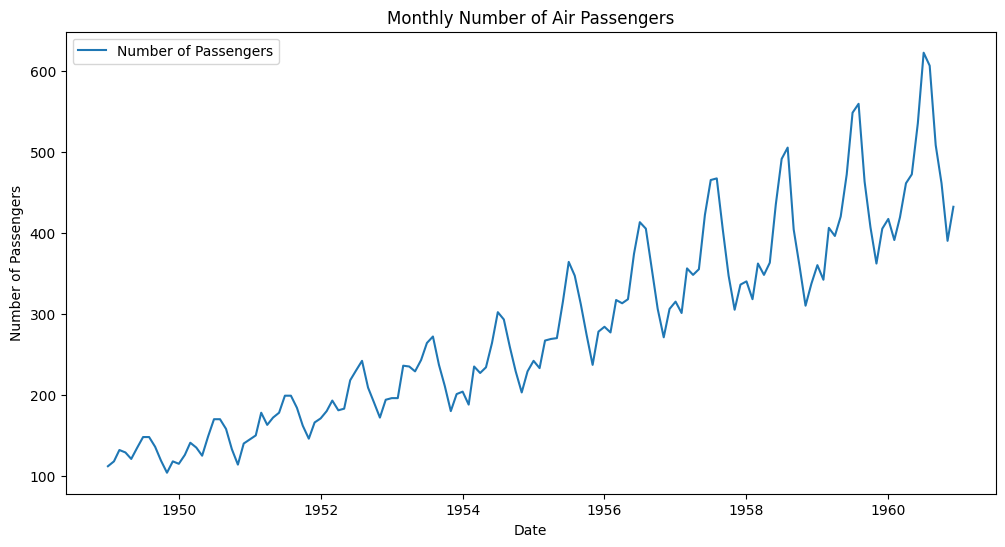

In [19]:
# Plot the airline passengers time series data
plt.figure(figsize=(12, 6))
plt.plot(airpass, label='Number of Passengers')
plt.title('Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


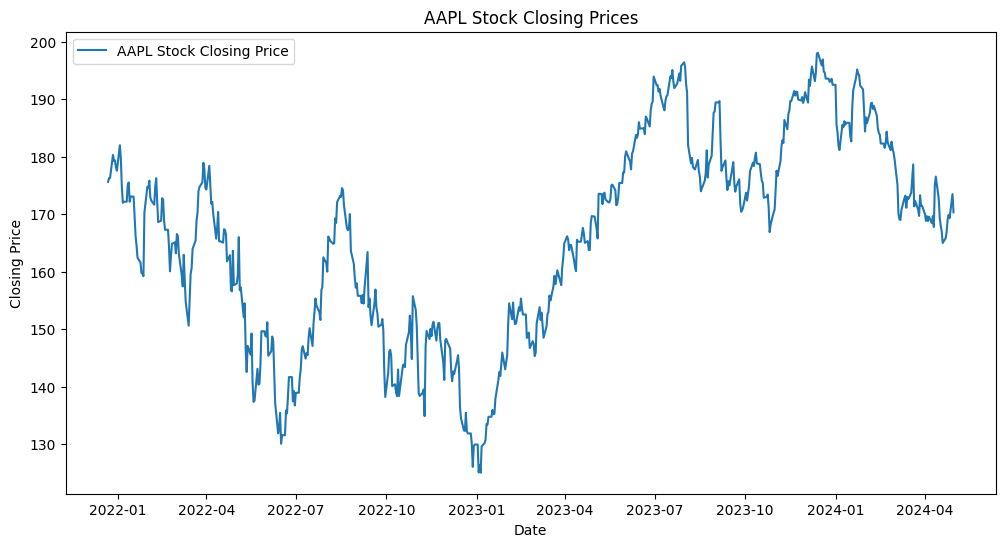

In [20]:
# Plot the AAPL stock closing price time series data
plt.figure(figsize=(12, 6))
plt.plot(aapl_close, label='AAPL Stock Closing Price')
plt.title('AAPL Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


## Data transformation 

To simplify the patterns in the historical data and make them more consistent across the entire dataset, we will apply various mathematical transformations to the airline passenger data. Transformations can help in stabilizing the variance and making the data more suitable for modeling. 

However, it's important to note that these transformations can significantly alter the interpretation of the data, so they should be used with caution. We will try multiple transformations and compare the results to determine which is most appropriate for our data.

### Logorithmic Transformation

The logarithmic transformation helps in stabilizing the variance of the time series data, particularly when the data spans several orders of magnitude.

            Passengers  Log_Passengers
Month                                 
1949-01-01         112        4.718499
1949-02-01         118        4.770685
1949-03-01         132        4.882802
1949-04-01         129        4.859812
1949-05-01         121        4.795791


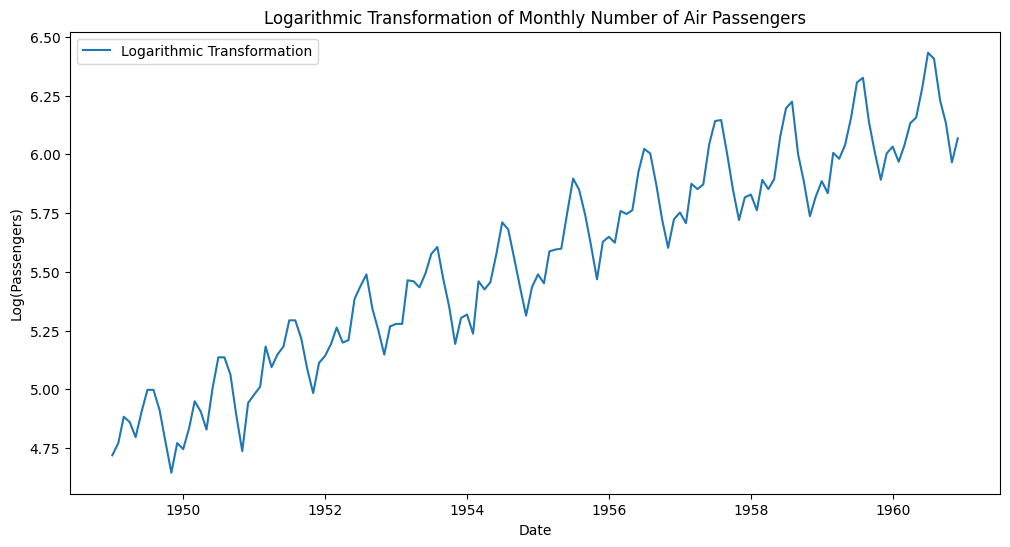

In [21]:
# Apply logarithmic transformation
airpass['Log_Passengers'] = np.log(airpass['Passengers'])
print(airpass.head())

# Plot the transformed data
plt.figure(figsize=(12, 6))
plt.plot(airpass['Log_Passengers'], label='Logarithmic Transformation')
plt.title('Logarithmic Transformation of Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Log(Passengers)')
plt.legend()
plt.show()

### Power transformation 
A power transformation, such as the square root transformation, can also help in stabilizing the variance and making the data more normally distributed.

            Passengers  Log_Passengers  Sqrt_Passengers
Month                                                  
1949-01-01         112        4.718499        10.583005
1949-02-01         118        4.770685        10.862780
1949-03-01         132        4.882802        11.489125
1949-04-01         129        4.859812        11.357817
1949-05-01         121        4.795791        11.000000


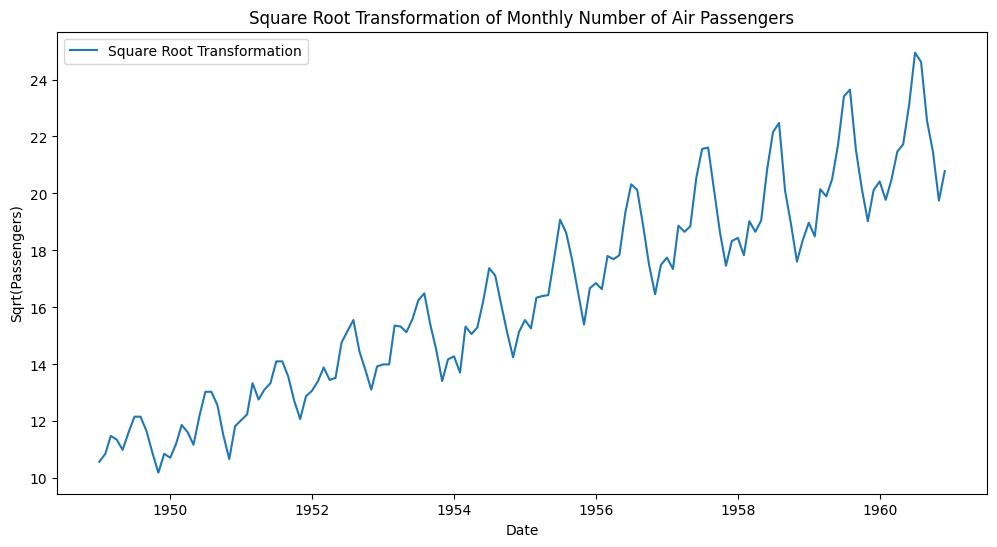

In [22]:
# Apply square root transformation
airpass['Sqrt_Passengers'] = np.sqrt(airpass['Passengers'])
print(airpass.head())

# Plot the transformed data
plt.figure(figsize=(12, 6))
plt.plot(airpass['Sqrt_Passengers'], label='Square Root Transformation')
plt.title('Square Root Transformation of Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Sqrt(Passengers)')
plt.legend()
plt.show()

### Box-Cox Transformation

The Box-Cox transformation is a more flexible transformation that can handle a wide range of data distributions. It requires all values to be positive, which our dataset already satisfies.


The Box-Cox transformation is defined as:

$ y(\lambda) = 
\begin{cases} 
\frac{y^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\
\ln(y) & \text{if } \lambda = 0 
\end{cases}
$

Where:
- $( y )$ is the original data.
- $( \lambda )$ is the transformation parameter.


the Transformation parameter detemines the nature of the transformation: 
- $\lambda = 1$  No transformation (the data remains unchanged).
- $\lambda = 0$  Logarithmic transformation.
- $\lambda = 0.5$  Square root transformation.

- Optimized $\lambda$ : The scipy.stats package provides a method to find the optimal value of 
$\lambda$ that maximizes the log-likelihood function of the transformed data.  This means that the transformed data is as close to normally distributed as possible, with stabilized variance. This is done using the boxcox function, which returns both the transformed data and the optimal $\lambda$

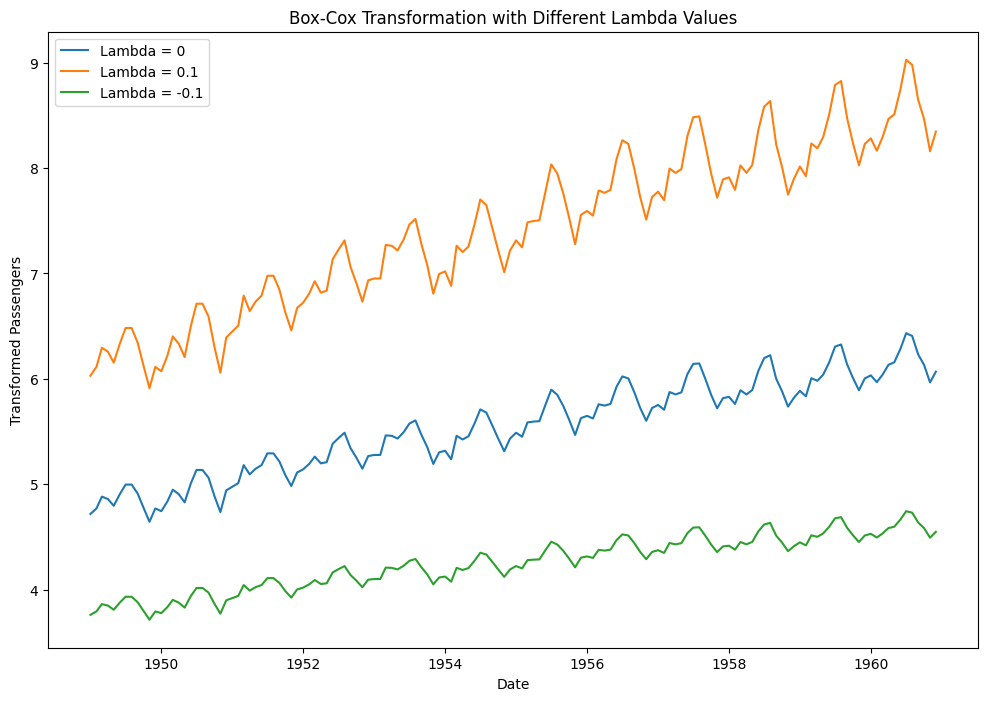

In [23]:
# Let's start by defining our own boxcox transformation function 

def boxcox_transform_and_plot(data, lambda_values):
    """
    Apply Box-Cox transformation to the data for different lambda values and plot the results.
    
    Parameters:
    data (pd.Series): The input time series data.
    lambda_values (list): A list of lambda values for the Box-Cox transformation.
    """
    plt.figure(figsize=(12, 8))
    
    for lmbda in lambda_values:
        if lmbda == 0:
            transformed_data = np.log(data)
        else:
            transformed_data = (data**lmbda - 1) / lmbda
        
        plt.plot(data.index, transformed_data, label=f'Lambda = {lmbda}')
    
    plt.title('Box-Cox Transformation with Different Lambda Values')
    plt.xlabel('Date')
    plt.ylabel('Transformed Passengers')
    plt.legend()
    plt.show()

# List of lambda values to visualize
lambda_values = [0, 0.1, -0.1] # you can try 1 to get the original data. 

# Apply the function to the airline passenger data
boxcox_transform_and_plot(airpass['Passengers'], lambda_values)

In [24]:
from scipy.stats import boxcox

            Passengers  Log_Passengers  Sqrt_Passengers  boxcox_Passengers
Month                                                                     
1949-01-01         112        4.718499        10.583005           6.827490
1949-02-01         118        4.770685        10.862780           6.932822
1949-03-01         132        4.882802        11.489125           7.161892
1949-04-01         129        4.859812        11.357817           7.114611
1949-05-01         121        4.795791        11.000000           6.983787


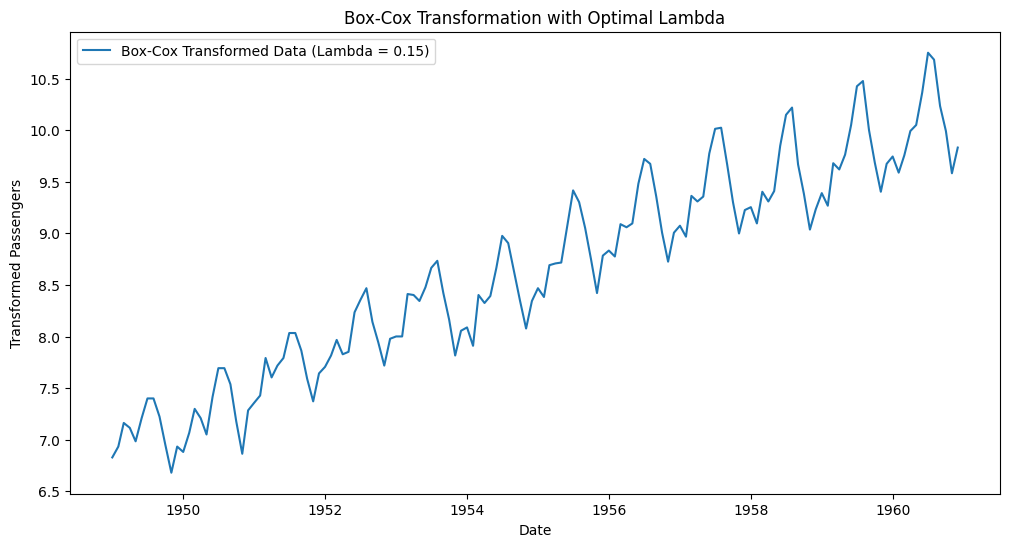

The optimal lambda for Box-Cox transformation is: 0.14802265137037945


In [25]:
# Apply Box-Cox transformation to find the optimal lambda
airpass['boxcox_Passengers'] , optimal_lambda = boxcox(airpass.Passengers)
print(airpass.head())

# Plot the transformed data with optimal lambda
plt.figure(figsize=(12, 6))
plt.plot( airpass['boxcox_Passengers'] , label=f'Box-Cox Transformed Data (Lambda = {optimal_lambda:.2f})')
plt.title('Box-Cox Transformation with Optimal Lambda')
plt.xlabel('Date')
plt.ylabel('Transformed Passengers')
plt.legend()
plt.show()

# Print the optimal lambda
print(f'The optimal lambda for Box-Cox transformation is: {optimal_lambda}')


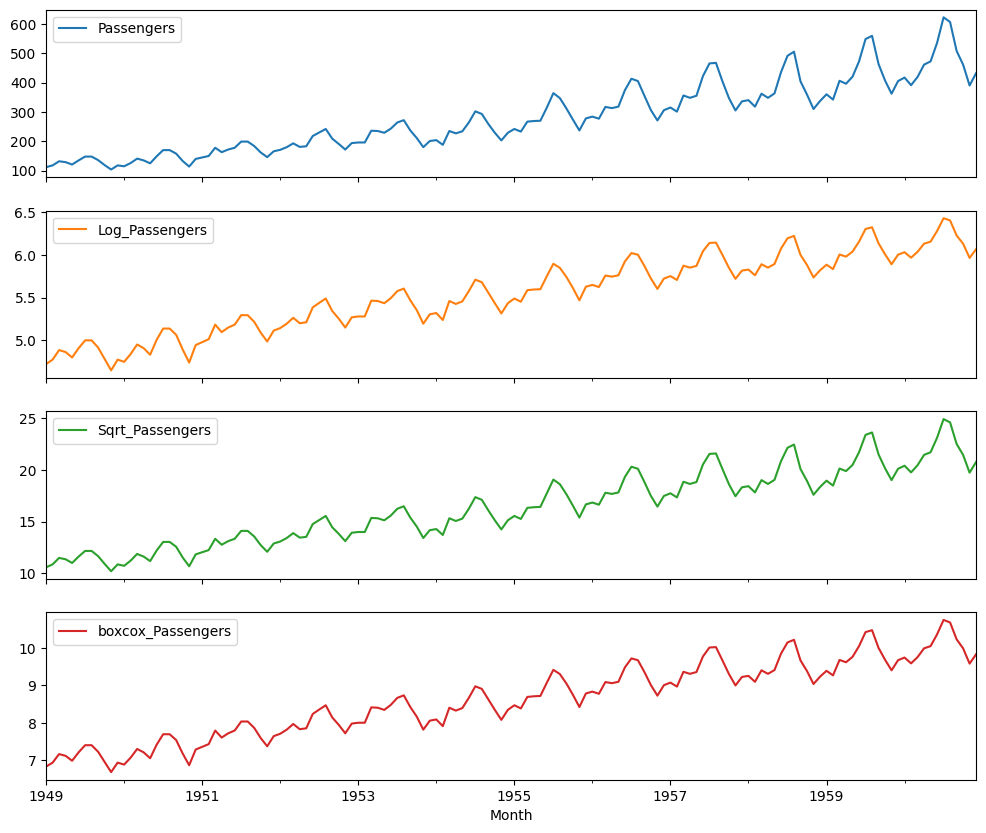

In [26]:
airpass.plot(subplots=True, figsize=(12,10))
plt.show()

**Summary**: Data transformation can enhance model performance and stability by:
- Stabilizing Variance: Reduces the impact of outliers and makes patterns more consistent.
- Improving Convergence: Especially in deep learning, normalized data speeds up training and leads to better results.
- Not Mandatory for Non-Parametric Models: While beneficial, transformations are not always required for non-parametric models like decision trees.


## ACF and PACF

Autocorrelation and partial autocorrelation plots are essential tools in time series analysis. They help in identifying the dependency between current and past values of the time series, which is crucial for model selection and understanding the underlying structure of the data. 

* ACF: https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html
* PACF: https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

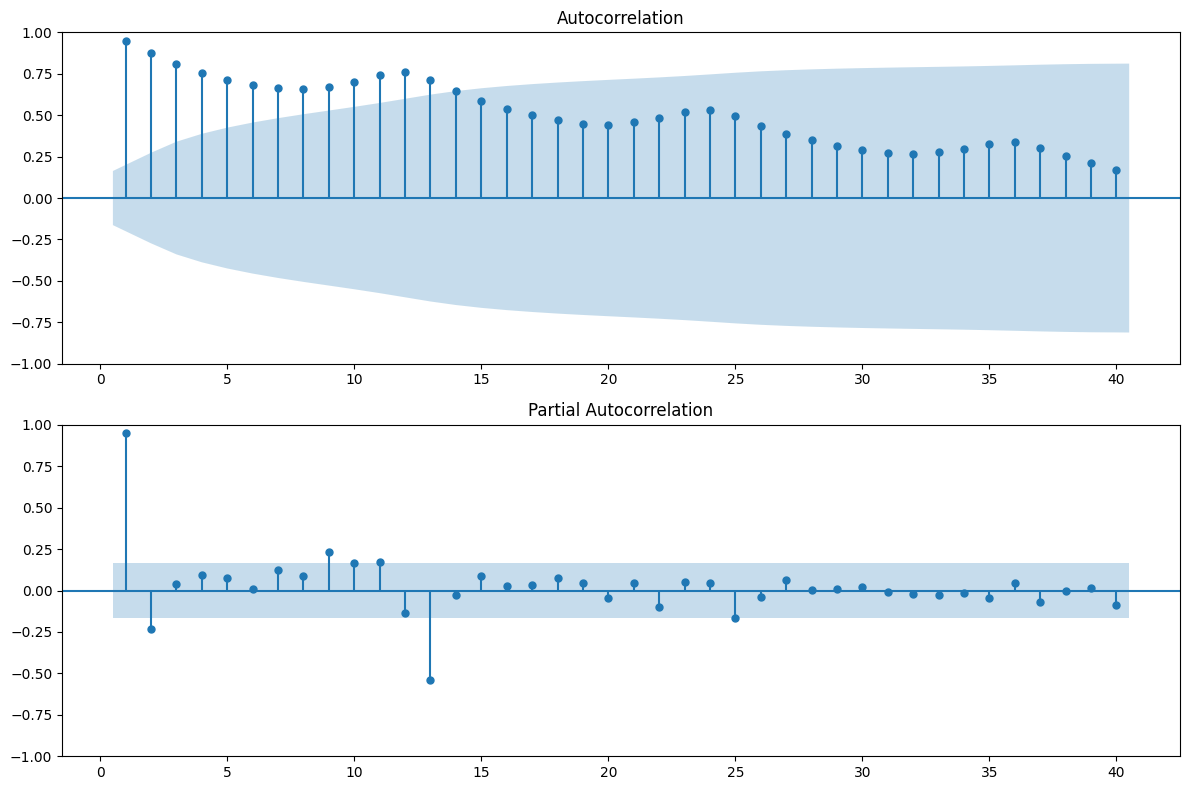

In [28]:
# Plot ACF and PACF for the original airline passenger data
plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(airpass['Passengers'], ax=plt.gca(), zero=False, lags=40)
plt.subplot(212)
plot_pacf(airpass['Passengers'], ax=plt.gca(), zero=False, lags=40)
plt.tight_layout()
plt.show()


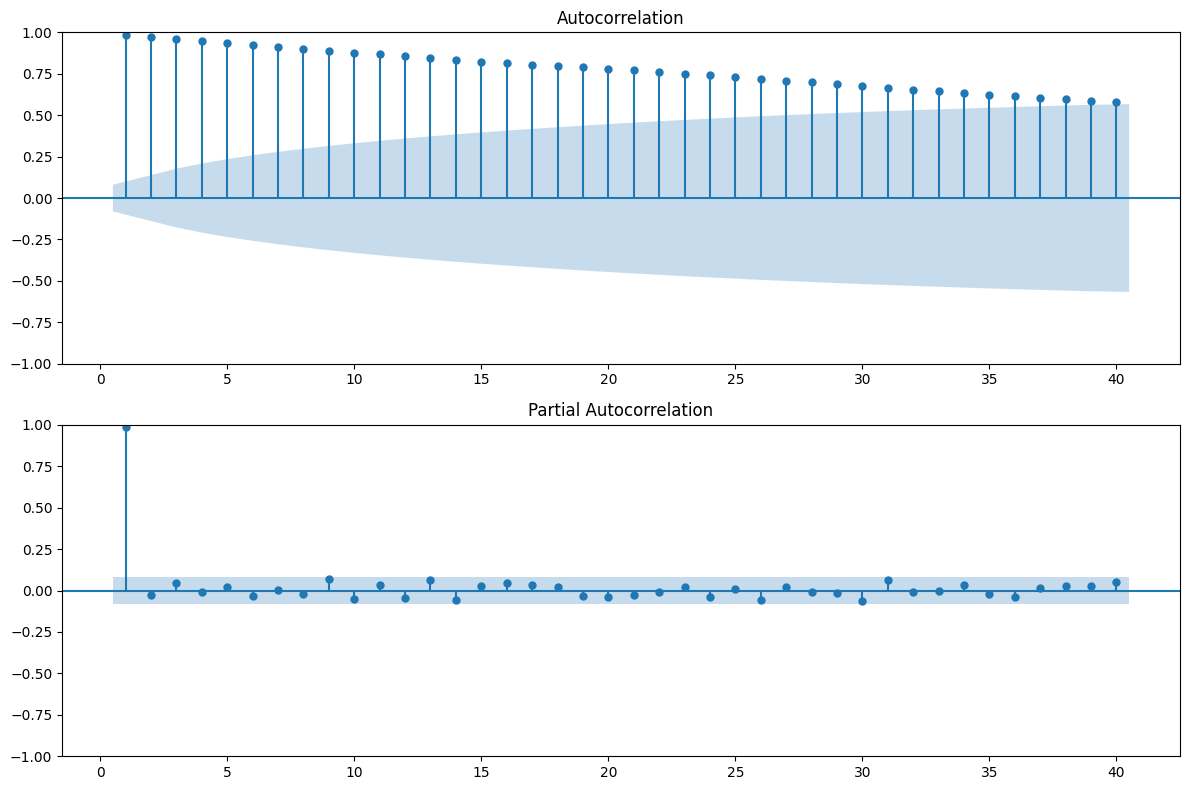

In [29]:
# Plot ACF and PACF for the original AAPL stock closing prices
plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(aapl['Close'], ax=plt.gca(), zero=False, lags=40)
plt.subplot(212)
plot_pacf(aapl['Close'], ax=plt.gca(), zero=False, lags=40)
plt.tight_layout()
plt.show()
plt.show()

## Stationarity and differencing 

Stationarity is a key assumption in many time series models, including ARIMA. A stationary time series has constant mean and variance over time, and its properties do not depend on the time at which the series is observed. Non-stationary data can lead to unreliable and spurious results, so it's often necessary to transform non-stationary data into a stationary form.

### Augmented Dickey-Fuller (ADF) Test
The ADF test is a statistical test used to check for stationarity. If the p-value of the test is less than a significance level (e.g., 0.05), we reject the null hypothesis that the time series is non-stationary. 

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

### Differencing

Differencing is a common technique to achieve stationarity. It involves subtracting the previous observation from the current observation. This can be repeated (second differencing, etc.) until the series becomes stationary.

In [30]:
from statsmodels.tsa.stattools import adfuller

adfuller(airpass.Passengers)

(0.8153688792060352,
 0.9918802434376408,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [31]:

# Function to perform ADF test
def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    if result[1] <= 0.05:
        print("=> The series is stationary.")
    else:
        print("=> The series is non-stationary.")

# Perform ADF test on original data
adf_test(airpass['Passengers'], title='Airline Passengers - Original')

Augmented Dickey-Fuller Test: Airline Passengers - Original
ADF Test Statistic               0.815369
p-value                          0.991880
# Lags Used                     13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
=> The series is non-stationary.


In [32]:
adf_test(aapl['Close'], title='AAPL Stock Closing Prices - Original')


Augmented Dickey-Fuller Test: AAPL Stock Closing Prices - Original
ADF Test Statistic              -1.978066
p-value                          0.296272
# Lags Used                      0.000000
Number of Observations Used    590.000000
Critical Value (1%)             -3.441482
Critical Value (5%)             -2.866451
Critical Value (10%)            -2.569386
=> The series is non-stationary.


Now we will difference the data to make it stationary! 

In [33]:
# Differencing the airline passenger data
airpass['Passengers_diff'] = airpass['Passengers'].diff()
airpass.head()

,Passengers,Log_Passengers,Sqrt_Passengers,boxcox_Passengers,Passengers_diff
Month,,,,,
1949-01-01,112,4.718499,10.583005,6.827490,NaN
1949-02-01,118,4.770685,10.862780,6.932822,6.0
1949-03-01,132,4.882802,11.489125,7.161892,14.0
1949-04-01,129,4.859812,11.357817,7.114611,-3.0
1949-05-01,121,4.795791,11.000000,6.983787,-8.0


Augmented Dickey-Fuller Test: Airline Passengers - Differenced
ADF Test Statistic              -2.829267
p-value                          0.054213
# Lags Used                     12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
=> The series is non-stationary.


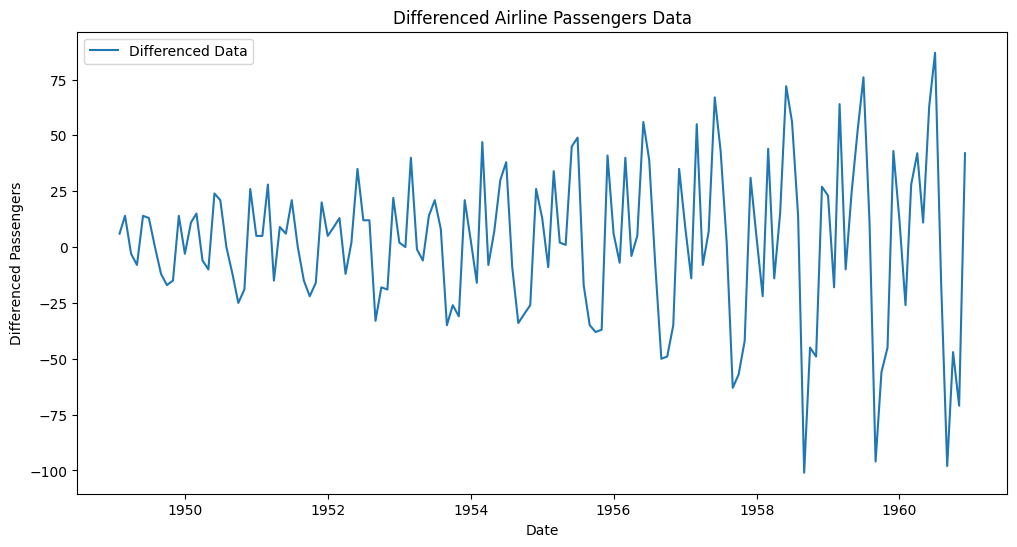

In [34]:
# Perform ADF test on differenced data
adf_test(airpass['Passengers_diff'].dropna(), title='Airline Passengers - Differenced')

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(airpass['Passengers_diff'], label='Differenced Data')
plt.title('Differenced Airline Passengers Data')
plt.xlabel('Date')
plt.ylabel('Differenced Passengers')
plt.legend()
plt.show()


Augmented Dickey-Fuller Test: Airline boxcox Passengers - Differenced
ADF Test Statistic              -2.871708
p-value                          0.048738
# Lags Used                     14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
=> The series is stationary.


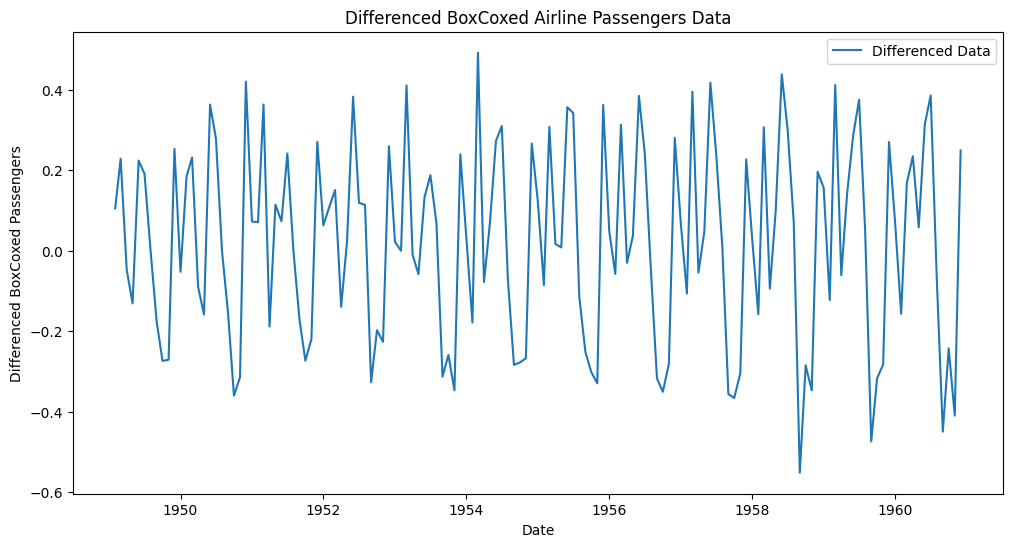

In [35]:
airpass['boxcox_Passengers_diff'] = airpass['boxcox_Passengers'].diff()

# Perform ADF test on differenced data
adf_test(airpass['boxcox_Passengers_diff'].dropna(), title='Airline boxcox Passengers - Differenced')

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(airpass['boxcox_Passengers_diff'], label='Differenced Data')
plt.title('Differenced BoxCoxed Airline Passengers Data')
plt.xlabel('Date')
plt.ylabel('Differenced BoxCoxed Passengers')
plt.legend()
plt.show()

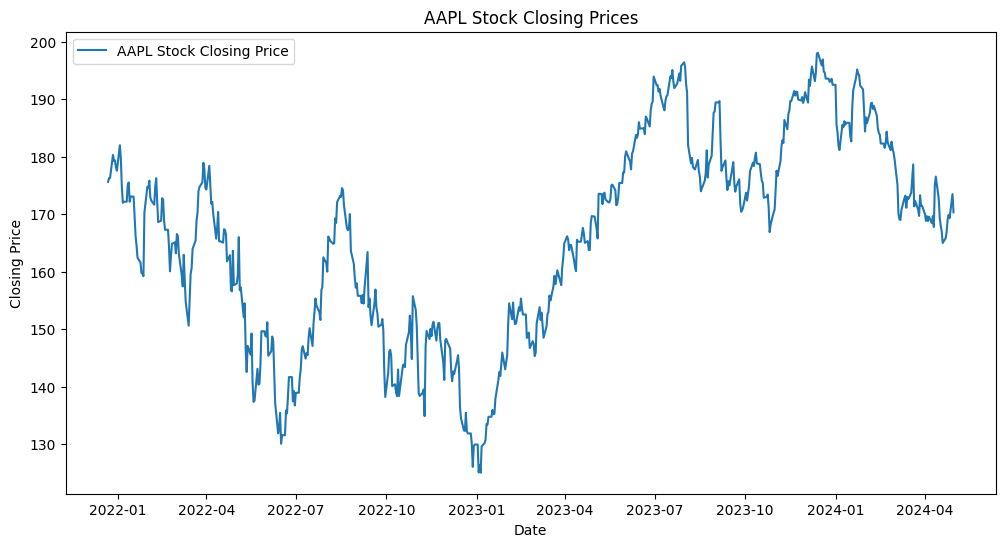

In [36]:
# Plot the AAPL stock closing price time series data
plt.figure(figsize=(12, 6))
plt.plot(aapl_close, label='AAPL Stock Closing Price')
plt.title('AAPL Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

Augmented Dickey-Fuller Test: AAPL Stock Closing Prices - Differenced
ADF Test Statistic             -23.800169
p-value                          0.000000
# Lags Used                      0.000000
Number of Observations Used    589.000000
Critical Value (1%)             -3.441501
Critical Value (5%)             -2.866460
Critical Value (10%)            -2.569390
=> The series is stationary.


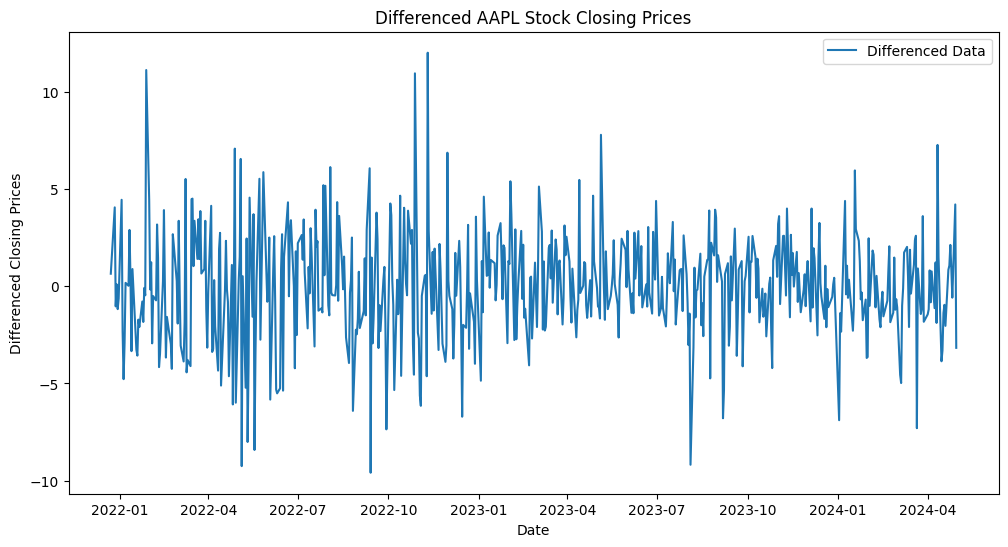

In [37]:
# Differencing the AAPL stock closing prices
aapl['Close_diff'] = aapl['Close'].diff()

# Perform ADF test on differenced data
adf_test(aapl['Close_diff'].dropna(), title='AAPL Stock Closing Prices - Differenced')

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(aapl['Close_diff'], label='Differenced Data')
plt.title('Differenced AAPL Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Closing Prices')
plt.legend()
plt.show()


By performing the ADF test, we can determine whether our time series data is stationary. If the series is non-stationary, we apply differencing to transform it into a stationary series. This transformation is essential for making reliable long-term predictions and for the proper functioning of many time series models.

## Seasonal Decomposition: 

Seasonal decomposition is a method that separates a time series into three components: trend, seasonal, and residual. This decomposition helps in understanding the underlying patterns in the data, which is useful for modeling and forecasting. We will use the seasonal_decompose function from the statsmodels library to perform this decomposition.

https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

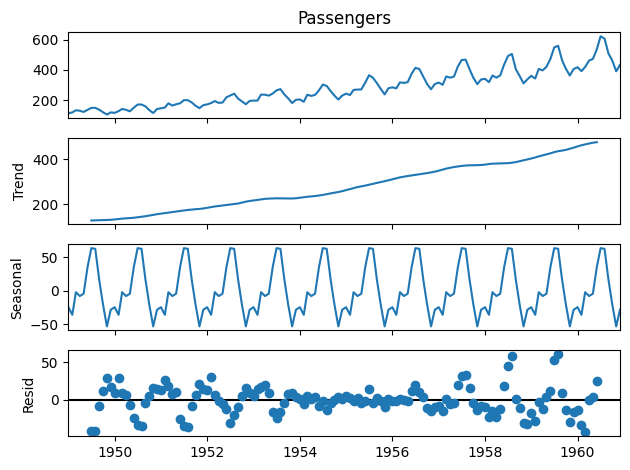

In [44]:
# Perform seasonal decomposition
result_airpass = seasonal_decompose(airpass['Passengers'], model='additive')

# Plot the decomposition
result_airpass.plot()
plt.show()


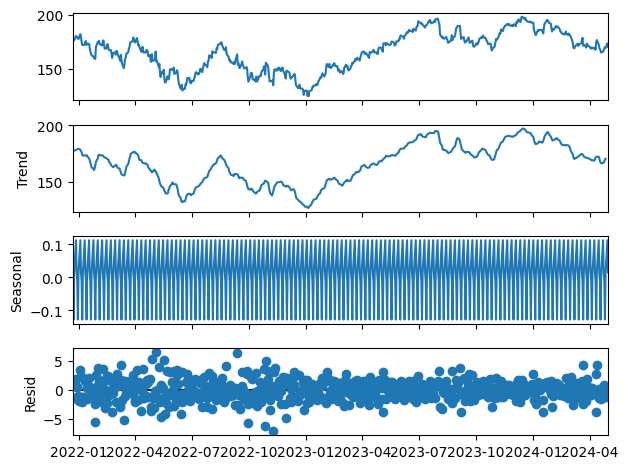

In [42]:
# Perform seasonal decomposition on AAPL closing prices
result_aapl = seasonal_decompose(aapl_close, model='additive') 

# Plot the decomposition
result_aapl.plot()
plt.show()


**Summary**: In this section, we performed seasonal decomposition on the airline passenger data and AAPL stock closing prices using the seasonal_decompose function from statsmodels. By decomposing the time series into trend, seasonal, and residual components, we can better understand the underlying patterns and behaviors in the data. This decomposition is a crucial step in time series analysis, aiding in both the interpretation and modeling of the data.